<a href="https://colab.research.google.com/github/thummapalasuresh/ML_-projects/blob/main/Car_Price_Perdiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

#Data Collection and preprocessing 

In [5]:
df= pd.read_csv("/content/car data.csv")

In [6]:
#accesing first 5 rows
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
#accesing last 5 rows
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [8]:
#shape of the dataset
df.shape

(301, 9)

In [11]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
#Statistical analysis on dataset
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [14]:
#checking null values in dataset
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [19]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [24]:
#checking for the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())
#df["Transmission"].value_counts()---> another method

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


#Encoding the data

In [29]:
#Encoding the "Fuel_type" column
df.replace({"Fuel_Type": {'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

#Encoding the "Seller_Type" column
df.replace({"Seller_Type": {'Dealer':0, 'Individual':1}}, inplace= True)

#Encoding the "Transmission" column
df.replace({"Transmission": {'Manual':0, 'Automatic':1}}, inplace=True)

In [30]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


#Spliting the data and the Target

In [34]:
x = df.drop(['Car_Name',"Selling_Price"], axis=1)
y= df['Selling_Price']
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [35]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


#spliting the training and testing data

In [42]:
x_train, x_test, y_train,y_test= train_test_split(x, y, test_size=0.1, random_state=2 )
print(x_train.shape, x_test.shape)

(270, 7) (31, 7)


#Model Training



1.  Linear Regression



In [45]:
lin_reg_model= LinearRegression()
lin_reg_model.fit(x_train,y_train)

LinearRegression()

Model Evaluation

In [ ]:
# prediction on Training data
train_data_prediction = lin_reg_model.predict(x_train)
train_data_prediction

In [49]:
# R squared error
err_score= metrics.r2_score(y_train,train_data_prediction)
err_score

0.8799451660493711

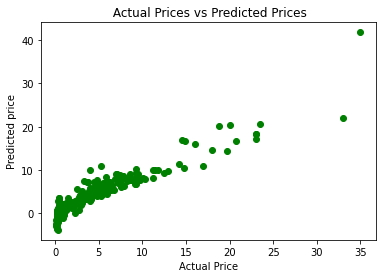

In [54]:
#visualization
plt.scatter(y_train,train_data_prediction,color='g')
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [61]:
#lin_reg_model= LinearRegression()
#lin_reg_model.fit(x_test,y_test)

In [62]:
test_data_prediction = lin_reg_model.predict(x_test)
test_data_prediction

array([11.03495511,  0.0587425 ,  4.98734157,  3.37519499, 10.49461963,
        4.48096185,  3.44194637,  5.79303592, -0.55653713,  5.72317441,
        6.95741558,  4.60885803,  0.65127991,  9.14398511,  2.73019734,
        0.57231936,  1.05331842,  0.90566946,  9.19110393,  4.80724986,
        0.75081153,  8.97436005,  0.52378125, 10.43208421, -0.1215052 ,
        6.98859921,  0.76010365,  0.2       ,  3.99921639,  1.83570043,
        1.57201626])

In [64]:
err_score= metrics.r2_score(y_test,test_data_prediction)
err_score

0.9616016091605228

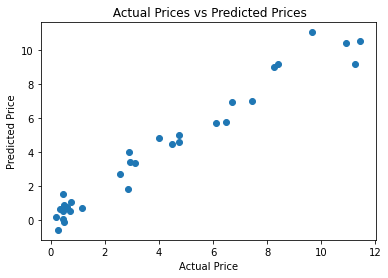

In [66]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

#Lasso Regression

In [69]:
lass_reg_model = Lasso()
lass_reg_model.fit(x_train,y_train)

Lasso()

predict the data

In [70]:
train_data_prediction = lass_reg_model.predict(x_train)
train_data_prediction

array([ 3.56679076e+00,  5.60257564e+00,  8.28781371e+00, -8.30814314e-01,
        5.27539880e+00,  6.50367937e+00,  5.73552938e+00,  6.41187200e+00,
        4.78218845e+00,  1.54979701e+01,  2.60868685e+00,  1.68164537e+00,
        4.65587149e-01,  5.14260426e+00,  6.87569869e+00,  1.60372469e+00,
        5.30299396e+00,  1.39150016e+01,  2.86877663e+00,  6.44421824e+00,
        9.38523430e-02,  9.99955865e+00,  1.79683394e+00,  2.66121014e+00,
        2.10269105e-02,  1.39327221e+00,  1.01152846e+01,  4.55985698e-01,
       -1.29850564e+00,  8.96458834e+00,  6.87473286e+00,  2.80689227e+00,
        4.00679563e+00,  8.93707044e-01,  3.11243615e+00,  2.61344453e+00,
        2.13519495e+00,  1.21115483e+00,  2.20395877e+00,  1.77253883e+00,
        4.40123646e+00,  4.26379158e+00,  1.53108120e+00,  2.67410546e+00,
        4.37186991e+00,  2.41613935e+00,  2.90706331e+00,  6.07491388e+00,
        5.02364608e+00,  4.39669701e+00,  3.59203190e+00,  2.67643327e+00,
        4.41172590e+00,  

In [72]:
error_score = metrics.r2_score(y_train, train_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8427856123435794


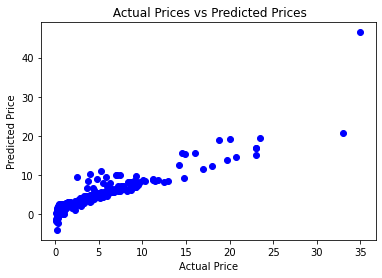

In [79]:
plt.scatter(y_train, train_data_prediction,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

Testing data

In [74]:
test_data_prediction = lass_reg_model.predict(x_test)
test_data_prediction

array([ 9.87888122,  1.42396266,  4.33267834,  3.17313445,  8.95590579,
        4.29397384,  3.73913632,  5.66283974,  0.91478394,  5.25514316,
        6.47238818,  4.39507335,  1.2955156 ,  8.26559961,  2.00292338,
        2.32529219,  2.55349653,  2.34742172,  7.96895166,  4.18441245,
        2.3369918 ,  7.86598537,  2.02308236,  8.56734786,  1.55498136,
        6.48561097,  2.11427451, -1.18422036,  4.01710445,  2.21749695,
        2.41820898])

In [75]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709167941173195


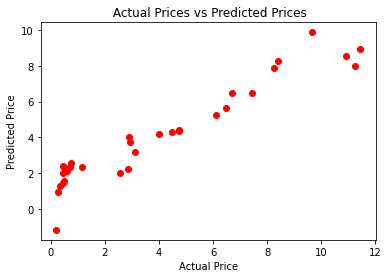

In [78]:
plt.scatter(y_test, test_data_prediction, color='r')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()